# Importar librerias

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ejercicio de la mochila

## Definir pesos, beneficios y capacidad

In [19]:
pesos = [20, 25, 20, 20 ,35, 40, 35, 30, 35, 25]
beneficios = [50, 35, 45, 20, 35, 40, 50, 50, 45, 40]
capacidad = 120

## Funcion de adaptabilidad

In [20]:
def evaluar_beneficio(individuo):
  beneficio = 0.0
  peso = 0.0
  beneficio = np.dot(individuo, beneficios)
  peso = np.dot(individuo, pesos)

  if peso > capacidad:
    beneficio = beneficio - peso

  return beneficio,

## Componentes geneticos

### Contenedor donde se almacenan diferentes artefactos geneticos

In [21]:
toolbox = base.Toolbox()

### Habilitar existencia de una funcion de adaptabilidad

In [22]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

### Declarar el tipo de gen, individuo y poblacion

In [23]:
toolbox.register("attribute", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### Test individuo y poblacion

In [24]:
ind = toolbox.individual()
pop = toolbox.population(n = 6)

print(f'Individuo: {ind}\nPoblación: {pop}')

Individuo: [0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
Población: [[1, 0, 0, 1, 0, 0, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 0, 1, 1]]


### Confirmar funcion adaptabilidad

In [25]:
ind = toolbox.individual()
print(f'Individuo a evaluar: {ind}')
print(f'¿Ha pasado por la función?: {ind.fitness.valid}')
ind.fitness.values = evaluar_beneficio(ind)
print(f'¿Ha pasado por la función?: {ind.fitness.valid}')
print(f'Valor de adaptabilidad: {ind.fitness}')

Individuo a evaluar: [0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
¿Ha pasado por la función?: False
¿Ha pasado por la función?: True
Valor de adaptabilidad: (np.float64(125.0),)


### Crear las operaciones genéticas

#### 1. Selección Competitiva

In [26]:
toolbox.register('evaluate', evaluar_beneficio)
toolbox.register('select', tools.selBest)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.1)

Configuración de estadísticas

In [27]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Promedio', np.mean)
stats.register('Desviación Estándar', np.std)
stats.register('Mínimo', np.min)
stats.register('Máximo', np.max)

Proceso generacional

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	512   	98.7598 	43.222             	0     	205   
1  	512   	94.0527 	42.9438            	0     	205   
2  	512   	97.4414 	44.2008            	0     	205   
3  	512   	98.1348 	44.6622            	0     	220   
4  	512   	100.723 	45.6075            	0     	220   
5  	512   	99.6387 	46.9522            	0     	220   
6  	512   	96.7871 	45.493             	0     	205   


7  	512   	95.5273 	44.4148            	0     	205   
8  	512   	97.2363 	45.924             	0     	205   
9  	512   	97.4902 	46.9416            	0     	205   
10 	512   	99.375  	45.5414            	0     	205   
11 	512   	97.7637 	45.3667            	0     	220   
12 	512   	97.4609 	44.4179            	0     	205   
13 	512   	95.1953 	43.1076            	0     	205   
14 	512   	96.3477 	44.5292            	0     	205   
15 	512   	95.6543 	43.5028            	0     	205   
16 	512   	95.8496 	43.5981            	0     	205   
17 	512   	97.2754 	44.594             	0     	220   
18 	512   	97.3242 	42.9067            	0     	200   
19 	512   	94.5898 	44.1569            	0     	205   
20 	512   	98.3496 	44.2059            	0     	205   
21 	512   	94.8926 	43.642             	0     	220   
22 	512   	94.8242 	43.3832            	0     	205   
23 	512   	94.6973 	43.2681            	10    	205   
24 	512   	94.8242 	42.5662            	10    	205   
25 	512   	96.9043 	43.756  

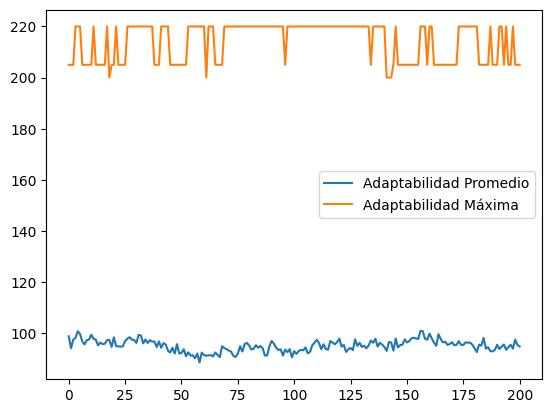

El individuo que presenta el mayor beneficio es: [1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
La adaptabilidad del mejor individuo es: (np.int64(205),)


In [28]:
population = toolbox.population(n = 512)
population, logbook = algorithms.eaSimple(population, toolbox,
                                          cxpb = 1, mutpb = 0.2,
                                          ngen = 200, stats = stats)
print(f'El resultado de la evolución es: \n{logbook}')
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_beneficio(tools.selBest(population, 1)[0])}')


#### 2. Selección Truncada

In [29]:
toolbox.register('evaluate', evaluar_beneficio)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.1)

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	512   	94.3652 	41.8976            	10    	220   
1  	512   	109.824 	41.9748            	30    	220   
2  	512   	120.889 	45.3539            	0     	220   
3  	512   	135.762 	43.3216            	0     	220   
4  	512   	140.381 	45.5329            	35    	220   
5  	512   	146.016 	46.2579            	45    	220   
6  	512   	150.654 	45.8962            	50    	220   
7  	512   	164.951 	43.4155            	55    	220   
8  	512   	176.143 	44.1047            	50    	220   
9  	512   	188.281 	42.7974            	45    	220   
10 	512   	200.078 	40.2191            	70    	220   
11 	512   	208.496 	32.5223            	70    	220   
12 	512   	207.041 	34.7182            	65    	220   
13 	512   	208.848 	32.4991            	70    	220   
14 	512   	209.58  	32.3701            	60    	220   
15 	512   	209.219 	32.5357            	70    	220   
16 	512   	208.008 	34.5823            	35    	220   
17 	512   	210.078 	30.9579 

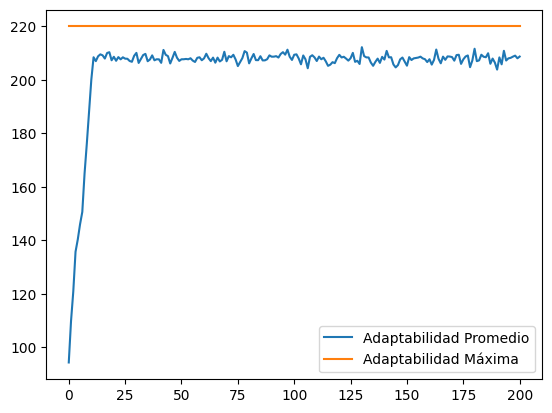

El individuo que presenta el mayor beneficio es: [1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
La adaptabilidad del mejor individuo es: (np.int64(220),)


In [30]:
population = toolbox.population(n = 512)
population, logbook = algorithms.eaSimple(population, toolbox, 
                                          cxpb = 1, mutpb = 0.2, 
                                          ngen = 200, stats = stats)
print(f'El resultado de la evolución es: \n{logbook}')
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_beneficio(tools.selBest(population, 1)[0])}')

# **Optimización de Portafolios**

Encontrar la cantidad optimizada de acciones de un conjunto de activos que maximicen la rentabilidad y minimicen el riesgo

# Librerías

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
from deap import base, creator, tools, algorithms

Tipo de información en Yahoo Finance

In [32]:
#Activos
stocks = ['AAPL', 'AMZN', 'COKE', 'GOOG']
#Índices
index = ['^DJI', '^IXIC', '^GSPC']
#Commodities
commodities = ['BZ=F', 'GC=F', 'SI=F']
#Monedas
coin = ['COP=X', 'MXN=X', 'BRL=X']

In [33]:
yf.download('NVDA', start = '2020-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972162,5.972162,5.892752,5.943286,237536000
2020-01-03,5.876571,5.920384,5.827531,5.852425,205384000
2020-01-06,5.901216,5.906443,5.757083,5.783221,262636000
2020-01-07,5.972660,6.018463,5.884537,5.929594,314856000
2020-01-08,5.983861,6.025184,5.928349,5.968427,277108000
...,...,...,...,...,...
2025-03-28,109.669998,112.870003,109.070000,111.489998,229872500
2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700


In [34]:
nvda = yf.Ticker('NVDA')
nvda

yfinance.Ticker object <NVDA>

In [35]:
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '(408) 486-2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment comprises Data Center computing platforms and end-to-end networking platforms, including Quantum for InfiniBand and Spectrum for Ethernet; NVIDIA DRIVE automated-driving platform and automotive development agreements; Jetson robotics and other embedded platforms; NVIDIA AI Enterprise and other software; and DGX Cloud software and services. The Graphics segment offers GeFor

In [36]:
print(f'{nvda.info['marketCap']:0,.2f}')

2,525,277,978,624.00


In [37]:
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [38]:
data = pd.DataFrame()
for t in stocks:
    data[t] = yf.download(t, start = '2020-01-01')['Close']
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AMZN,COKE,GOOG
Date,,,,
2020-01-02,72.716080,94.900497,270.641388,68.046204
2020-01-03,72.009117,93.748497,273.861542,67.712273
2020-01-06,72.582916,95.143997,270.267700,69.381882
2020-01-07,72.241547,95.343002,267.536316,69.338577
2020-01-08,73.403641,94.598503,265.715454,69.885002
...,...,...,...,...
2025-03-28,217.899994,192.720001,1330.199951,156.059998
2025-03-31,222.130005,190.259995,1350.000000,156.229996
2025-04-01,223.190002,192.169998,1388.790039,158.880005


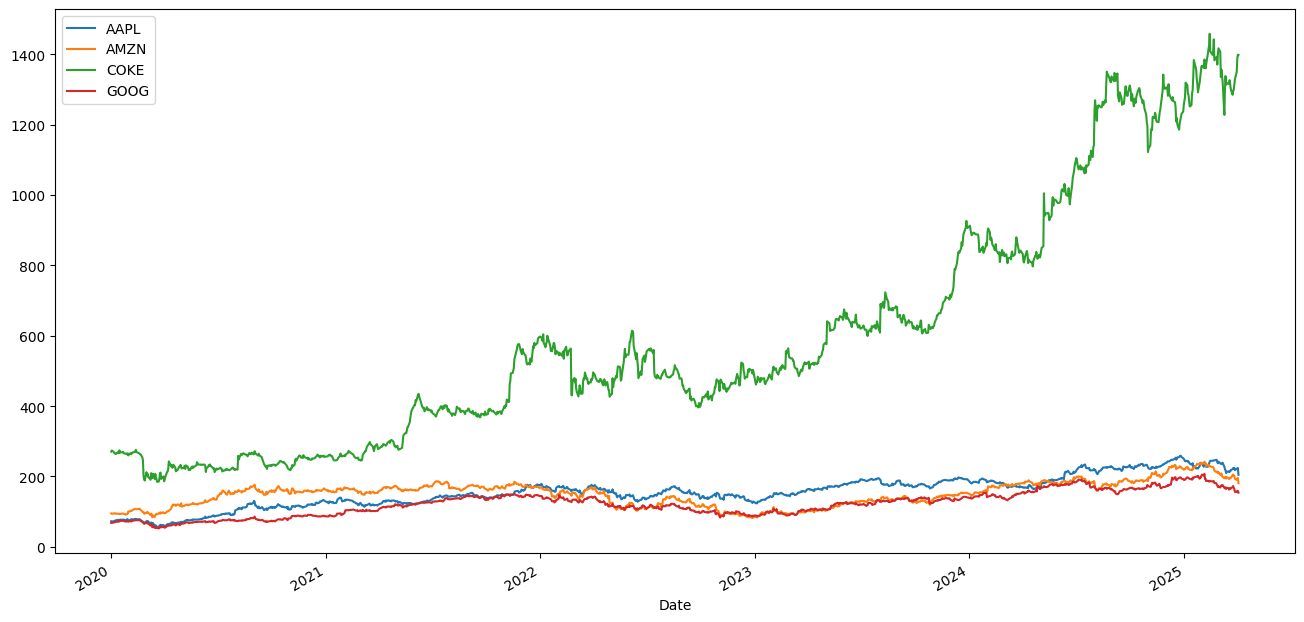

In [39]:
data.plot(figsize = (16, 8))
plt.show()

# Retornos simples y logarítmicos

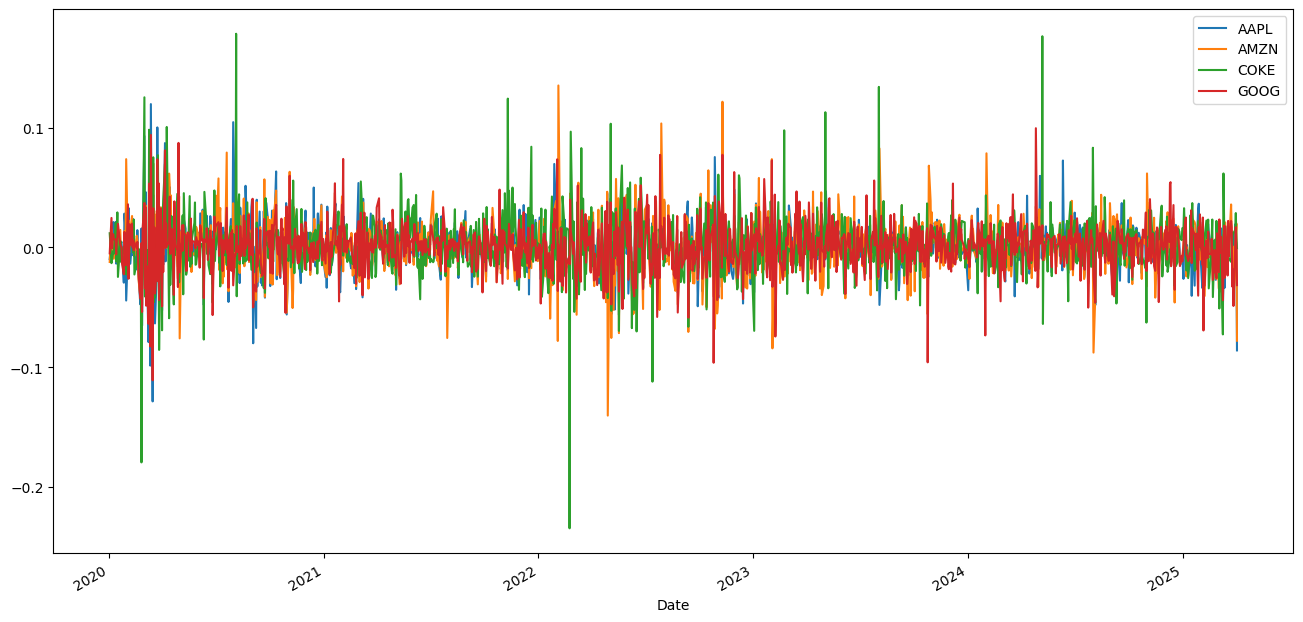

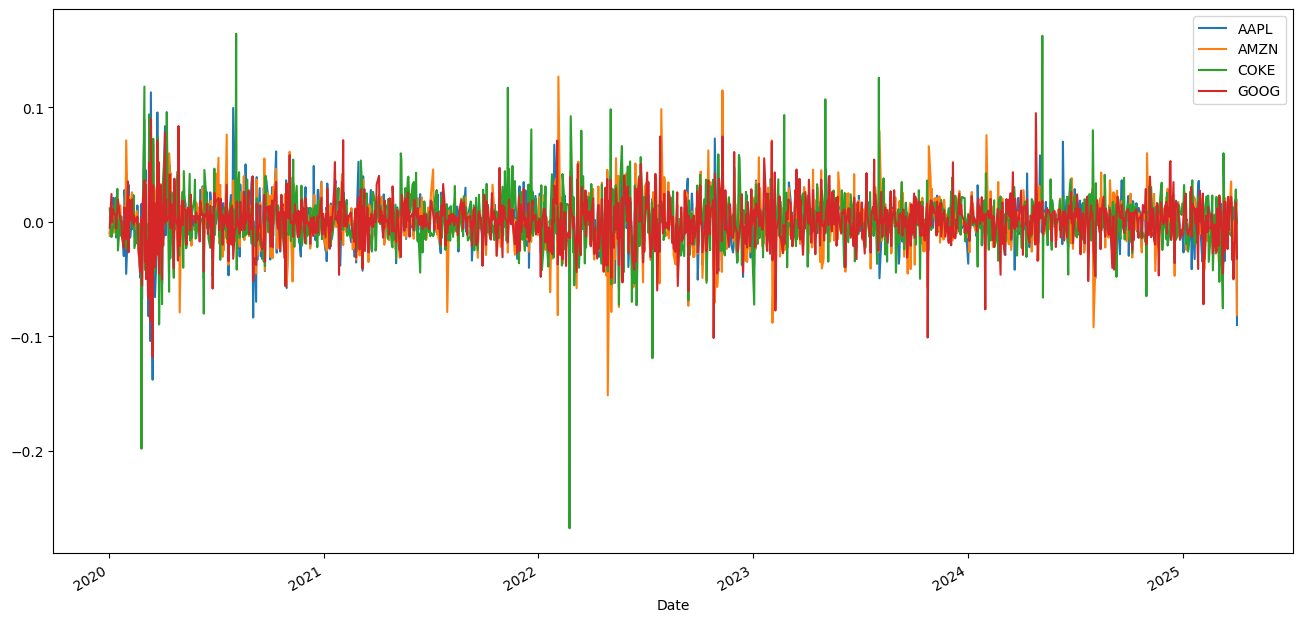

In [40]:
retorno_simple_diario = data.pct_change().dropna()
retorno_log_diario = np.log(data/data.shift(1)).dropna()
retorno_simple_diario.plot(figsize = (16, 8))
retorno_log_diario.plot(figsize = (16, 8))
plt.show()

# Implementación del algoritmo evolutivo

Capacidad de activos 5000

In [41]:
#Función de adaptabilidad
def evaluar_portafolio(individuo, ret_simple, ret_logaritmico):
    capacidad = 5000
    pesos = np.array(individuo)/np.sum(individuo)
    if np.sum(individuo) <= capacidad:
        rentabilidad = np.dot(ret_simple.mean() * 252, pesos)
        riesgo = np.sqrt(np.dot(np.transpose(pesos), np.dot(ret_logaritmico.cov() * 252, pesos)))
    else:
        rentabilidad = 0
        riesgo = 999999
    return rentabilidad, riesgo,

Componentes genéticos

In [42]:
#Declarar la caja de herramientas
toolbox = base.Toolbox()

#Declarar las clases función de adaptabilidad e individuo
creator.create('FitnessMulti', base.Fitness, weights = (1.0, -1.0))
creator.create('Individual', list, fitness = creator.FitnessMulti)

#Declarar el gen, el individuo y la población
toolbox.register('attribute', random.randint, 200, 2500)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 4)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Declarar los operadores genéticos
toolbox.register('evaluate', evaluar_portafolio, ret_simple = retorno_simple_diario,
                 ret_logaritmico = retorno_log_diario)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutGaussian, mu = 30, sigma = 3, indpb = 0.05)

In [44]:
population = toolbox.population(n = 3000)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 1, mutpb = 0.05,
                                          ngen = 300, stats = stats, verbose = True)

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	3000  	306166  	460899             	0     	999999
1  	3000  	173500  	378678             	0     	999999
2  	3000  	71166.8 	257103             	0     	999999
3  	3000  	27333.6 	163053             	0     	999999
4  	3000  	9500.29 	97003.7            	0     	999999
5  	3000  	333.649 	18254.4            	0     	999999
6  	3000  	0.326126	0.0147558          	0.26847	0.356118
7  	3000  	0.333508	0.0125851          	0.290882	0.355805
8  	3000  	0.338809	0.0108789          	0.309227	0.356976
9  	3000  	0.342312	0.00982984         	0.316844	0.357405
10 	3000  	0.344677	0.00916552         	0.324049	0.35764 
11 	3000  	0.346325	0.00872321         	0.330382	0.357909
12 	3000  	0.34747 	0.00845179         	0.334057	0.357957
13 	3000  	0.348292	0.00827584         	0.336117	0.358065
14 	3000  	0.348904	0.00814438         	0.337683	0.358258
15 	3000  	0.349368	0.00803683         	0.337063	0.358303
16 	3000  	0.349734	0.00794444         	0.3

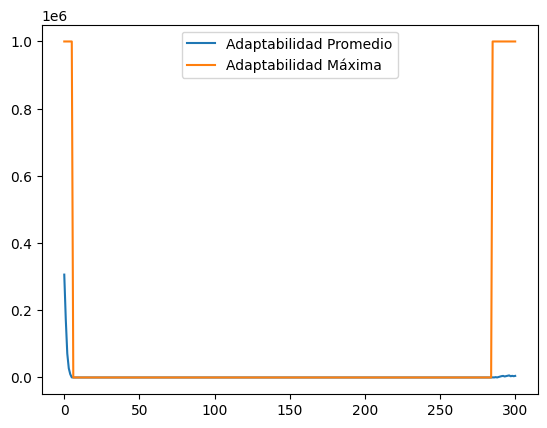

El individuo que presenta el mayor beneficio es: [207, 200, 4390.3571533384775, 201]
La adaptabilidad del mejor individuo es: (np.float64(0.3712042570198569), np.float64(0.3624751119074293))


In [45]:
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_portafolio(tools.selBest(population, 1)[0],
                                                                     ret_simple = retorno_simple_diario,
                                                                     ret_logaritmico = retorno_log_diario)}')
